In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/IqbalHalim/IqbalHalim/main/UTS-Muhammad%20Iqbal%20-%20Sheet1.csv")

In [3]:
df

,X1,X2,Y
0,60,30,65
1,55,35,70
2,45,40,62
3,65,50,75
4,70,55,80
5,75,60,85
6,80,65,90
7,90,70,95
8,89,66,77
9,87,78,87


## Membuat autocorrelaction plot

In [ ]:
# Membuat autocorrelation plot untuk setiap kolom dengan warna yang berbeda
colors = ['b', 'g', 'r']  # Blue, Green, Red

#Membuat gambar (figure) dengan ukuran 12x6 inci.
plt.figure(figsize=(12, 6))

kode colors, digunakan untuk mewarnai tiap kolom dengan warna yang berbeda.
**plt.figure(figsize=(12, 6))** membuat ukuran 12x6 inci.

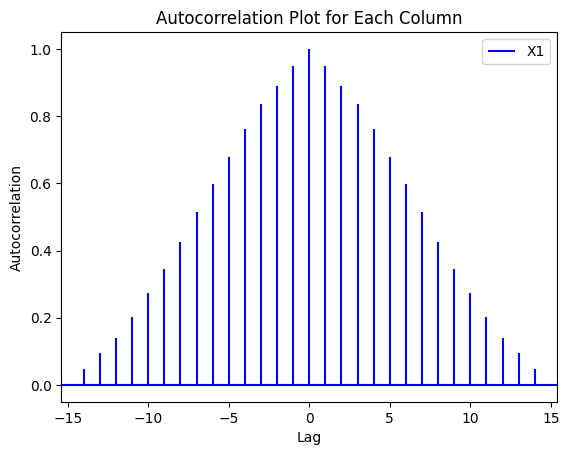

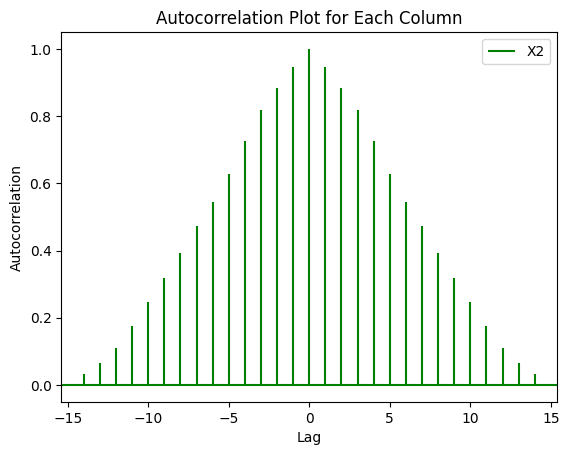

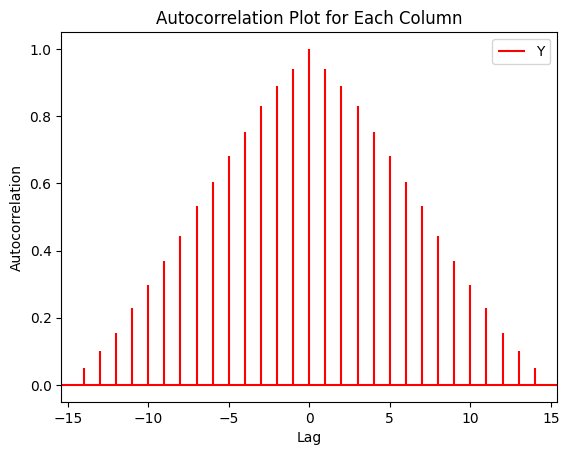

In [21]:
#digunakan untuk mengiterasi melalui setiap kolom dalam dataframe 'df' beserta indeksnya (i).
for i, col in enumerate(df.columns):

    #Membuat plot autocorrelation untuk kolom 'col' dengan warna yang sesuai dari daftar 'colors'. 
    #maxlags adalah panjang maksimum lag yang digunakan dalam plot. Label untuk setiap kolom ditentukan sebagai 'col'.
    plt.acorr(df[col], maxlags=len(df[col]) - 1, label=col, color=colors[i])
     #Menetapkan judul untuk plot.
    plt.title('Autocorrelation Plot for Each Column')

    #Menetapkan label sumbu x
    plt.xlabel('Lag')

    #Menetapkan label sumbu y.
    plt.ylabel('Autocorrelation')

    #Menampilkan legenda untuk kolom-kolom yang ada.
    plt.legend()
    plt.show()

ndoop `for col in df.columns` digunakan untuk mengiterasi melalui setiap kolom dalam dataframe 'df'.

4. Membuat plot autocorrelation untuk setiap kolom:
   - `plt.acorr(df[col], maxlags=len(df[col]) - 1, label=col)`: Ini menggambar plot autocorrelation untuk setiap kolom 'col' dalam dataframe 'df'. `maxlags` adalah panjang maksimum lag yang digunakan dalam plot, yang dihitung sebagai panjang kolom dikurangi 1. Label kolom ditetapkan sebagai 'col'.
   - `plt.title(f'Autocorrelation Plot for {col}')`: Menetapkan judul plot yang mencakup nama kolom.
   - `plt.xlabel('Lag')` dan `plt.ylabel('Autocorrelation')`: Menetapkan label sumbu x dan y pada plot.
   - `plt.legend()`: Menambahkan legenda yang  signifikan dari yang tidak signifikan.suai.

## Membuat Regresi Linier

In [5]:
x = df[['X1', 'X2']]
y = df['Y']

Dalam langkah ini, kita memisahkan data yang akan digunakan untuk regresi linier. Variabel x berisi fitur-fitur atau prediktor yang digunakan untuk memprediksi y. Di sini, kita menggunakan kolom 'X1' dan 'X2' sebagai fitur. Variabel y berisi target atau output yang akan diprediksi, yaitu kolom 'Y' dalam dataframe.

In [6]:
#Membangun model regresi linier
model = LinearRegression()
model.fit(x, y)

LinearRegression()

Di sini, kita membuat objek model regresi linier dengan memanggil LinearRegression() dari scikit-learn. Selanjutnya, kita melatih model dengan data kita menggunakan metode .fit(x, y). Ini akan menghitung koefisien dan intercept yang sesuai dengan model regresi linier.

In [7]:
#Menampilkan koefisien dan intercept dari model
print("Koefisien: ", model.coef_)
print("Intercept: ", model.intercept_)

Koefisien:  [0.42954795 0.16985443]
Intercept:  37.22563682184434


Kode ini mencetak koefisien (slopes) dan intercept (intersepsi) dari model regresi linier. Koefisien adalah faktor yang mengukur sejauh mana setiap fitur mempengaruhi variabel target, sedangkan intercept adalah nilai ketika semua fitur adalah nol. Hasil cetakan ini akan memberikan nilai-nilai koefisien dan intercept yang telah dihitung oleh model regresi linier.

Hasil cetakan dari kode ini akan menampilkan koefisien dan intercept dari model regresi linier Anda. Koefisien akan memberi Anda informasi tentang seberapa besar dampak setiap fitur (X1 dan X2) terhadap variabel target (Y), sedangkan intercept adalah nilai dari variabel target ketika semua fitur adalah nol. Koefisien positif menunjukkan hubungan positif dengan variabel target, sementara koefisien negatif menunjukkan hubungan negatif. Intersepsi adalah nilai Y ketika semua fitur adalah nol.

## Membuat UJI Heteroskedastisitas

In [8]:
X = sm.add_constant(df[['X1', 'X2']])

Di sini, konstanta (intersep) ditambahkan ke model regresi. Variabel X akan berisi dua kolom, yaitu 'X1' dan 'X2', serta kolom konstanta.

In [9]:
y = df['Y']

Variabel y akan berisi kolom 'Y' dari dataset, yang merupakan variabel dependen dalam model regresi.

In [10]:
# Membangun model regresi
model = sm.OLS(y, X).fit()

Ini adalah langkah pembangunan model regresi. Model Ordinary Least Squares (OLS) digunakan untuk mengestimasi parameter-parameter model regresi. Hasilnya disimpan dalam variabel model.

In [11]:
bp_test = het_breuschpagan(model.resid, X)

Di sini, dilakukan uji heteroskedastisitas dengan menggunakan uji Breusch-Pagan. Fungsi het_breuschpagan digunakan untuk menghitung statistik uji Breusch-Pagan berdasarkan residu dari model regresi dan variabel X.

In [12]:
bp_value = bp_test[1]

P-value dari uji Breusch-Pagan disimpan dalam variabel bp_value.

In [13]:
# Menampilkan hasil uji
if bp_value < 0.05:
    print("Terdapat bukti heteroskedastisitas (p-value < 0.05)")
else:
    print("Tidak ada bukti heteroskedastisitas (p-value >= 0.05)")

Tidak ada bukti heteroskedastisitas (p-value >= 0.05)


Terakhir, kode memeriksa p-value (bp_value) untuk menentukan apakah ada bukti heteroskedastisitas dalam model regresi. Jika bp_value kurang dari 0.05 (tanda <), maka hasil uji menunjukkan adanya bukti heteroskedastisitas, dan pesan "Terdapat bukti heteroskedastisitas (p-value < 0.05)" akan dicetak. Sebaliknya, jika bp_value lebih besar atau sama dengan 0.05 (tanda >=), maka pesan "Tidak ada bukti heteroskedastisitas (p-value >= 0.05)" akan dicetak.

Jadi, hasil output "Tidak ada bukti heteroskedastisitas (p-value >= 0.05)" menunjukkan bahwa berdasarkan uji Breusch-Pagan, tidak ada bukti yang cukup kuat untuk mendukung keberadaan heteroskedastisitas dalam model regresi. Dalam konteks ini, ini adalah hasil yang diinginkan karena heteroskedastisitas dapat memengaruhi validitas hasil analisis regresi. Dengan kata lain, model regresi ini diasumsikan memiliki asumsi homoskedastisitas yang diinginkan.


## Membuat UJI Mulikolonieritas

In [14]:
# Menambahkan konstanta ke model
X = df[['X1', 'X2']]# Hanya variabel independen


Di sini, variabel independen 'X1' dan 'X2' dari dataset disimpan dalam variabel X.

In [15]:
X = sm.add_constant(X)

Kemudian, konstanta (intersep) ditambahkan ke model. Konstanta ini adalah variabel yang bernilai 1 untuk semua observasi, yang diperlukan untuk memperhitungkan konstanta dalam model regresi.

In [16]:
# Menghitung VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

**vif = pd.DataFrame()**: Di sini, dibuat sebuah DataFrame kosong yang akan digunakan untuk menyimpan hasil perhitungan VIF.
vif["Variable"] = X.columns: Dalam DataFrame vif, kolom "Variable" diisi dengan nama-nama variabel dari X.
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]: Dalam langkah ini, VIF dihitung untuk setiap variabel independen dalam X. Fungsi variance_inflation_factor dari modul statsmodels.stats.outliers_influence digunakan untuk menghitung VIF. Hasil perhitungan VIF disimpan dalam kolom "VIF" DataFrame vif.

In [17]:
# Menampilkan hasil VIF
print(vif)

  Variable        VIF
0    const  37.105665
1       X1   3.324964
2       X2   3.324964


print(vif): Hasil perhitungan VIF ditampilkan dalam bentuk DataFrame.

Variable" adalah nama variabel atau konstanta.
"VIF" adalah nilai Variance Inflation Factor (Faktor Inflasi Varians) untuk masing-masing variabel. Nilai VIF untuk konstanta sangat tinggi (37.105665), yang menunjukkan adanya multicollinearity dalam model. Di sisi lain, nilai VIF untuk 'X1' dan 'X2' adalah sekitar 3.324964, yang menunjukkan bahwa kedua variabel tersebut memiliki tingkat multicollinearity yang lebih rendah. Nilai VIF yang tinggi (biasanya di atas 10) untuk variabel independen menandakan adanya masalah multicollinearity yang perlu diperhatikan dalam analisis regresi.

## Membuat Algortima Regresi dengan paket STATMODEL

In [18]:

# Menambahkan konstanta ke model
X = df[['X1', 'X2']]
X = sm.add_constant(X)
y = df['Y']

# Membangun model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     13.78
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           0.000779
Time:                        22:49:51   Log-Likelihood:                -47.595
No. Observations:                  15   AIC:                             101.2
Df Residuals:                      12   BIC:                             103.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2256     10.161      3.664      0.0

C:\Users\Muhammad Iqbal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




1. **Dep. Variable (Variabel Dependan)**: Ini adalah nama variabel dependen, dalam hal ini 'Y'.

2. **R-squared**: R-squared (R^2) adalah ukuran sejauh mana variabilitas dalam data (variabel dependen 'Y') dapat dijelaskan oleh model regresi. Nilai R-squared adalah 0.697, yang berarti sekitar 69.7% variabilitas dalam 'Y' dapat dijelaskan oleh model. Semakin tinggi nilai R-squared, semakin baik modelnya.

3. **Adj. R-squared**: Adj. R-squared adalah R-squared yang disesuaikan dengan jumlah variabel independen dan jumlah observasi. Nilainya adalah 0.646.

4. **F-statistic**: Ini adalah statistik uji F, yang digunakan untuk menguji keseluruhan signifikansi model. Nilainya adalah 13.78, dan probabilitas (Prob (F-statistic)) adalah 0.000779. Nilai probabilitas yang rendah menunjukkan bahwa model secara keseluruhan signifikan.

5. **coef (Koefisien Regresi)**: Di bawah ini adalah koefisien regresi untuk setiap variabel dalam model.
   - Konstanta (const): 37.2256
   - Koefisien untuk 'X1': 0.4295
   - Koefisien untuk 'X2': 0.1699

   Koefisien ini menunjukkan hubungan antara variabel independen dan dependen. Misalnya, koefisien untuk 'X1' adalah 0.4295, yang berarti bahwa setiap peningkatan satu unit dalam 'X1' akan menghasilkan peningkatan sekitar 0.4295 unit dalam 'Y'.

6. **std err (Standar Error)**: Standar error adalah perkiraan dari seberapa akurat koefisien regresi tersebut. Semakin rendah standar errornya, semakin baik akurasi koefisien.

7. **t (t-statistic)**: Statistik t digunakan untuk menguji signifikansi koefisien. Nilai t adalah hasil dari membagi koefisien dengan standar errornya. Semakin besar nilai t, semakin signifikan koefisien tersebut.

8. **P>|t| (P-value)**: Ini adalah nilai p-value yang mengukur signifikansi statistik koefisien. Nilai p-value di bawah level signifikansi (biasanya 0.05) menunjukkan bahwa koefisien tersebut signifikan. Dalam hal ini, 'const' dan 'X1' memiliki p-value yang kurang dari 0.05, sedangkan 'X2' memiliki p-value yang lebih tinggi dari 0.05.

9. **Omnibus**: Statistik Omnibus dan nilai probabilitasnya (Prob(Omnibus)) digunakan untuk menguji asumsi normalitas residual. Nilai probabilitas yang rendah bisa menunjukkan bahwa asumsi normalitas tidak terpenuhi.

10. **Durbin-Watson**: Statistik Durbin-Watson adalah ukuran otonomi dari residual dalam model. Nilainya adalah 1.881. Nilai antara 1 dan 2 biasanya dianggap wajar, dan nilai yang lebih rendah dapat menunjukkan adanya autokorelasi.

11. **Jarque-Bera (JB)**: Statistik Jarque-Bera dan probabilitasnya (Prob(JB)) digunakan untuk menguji asumsi normalitas dan kurtosis residual. Nilai probabilitas yang tinggi menunjukkan bahwa asumsi normalitas dan kurtosis terpenuhi.

12. **Skew**: Nilai skewness mengukur sejauh mana distribusi residual miring. Skewness negatif (-0.714) menunjukkan bahwa distribusi cenderung miring ke kiri.

13. **Kurtosis**: Nilai kurtosis mengukur sejauh mana distribusi residual lebih atau kurang tajam dibandingkan distribusi normal. Nilai kurtosis sekitar 2.715 menunjukkan bahwa distribusi residual agak lebih tumpul dibandingkan distribusi normal.

14. **Cond. No.**: Ini adalah angka kondisi (condition number) yang mengukur sejauh mana variabilitas dalam data menyebabkan masalah multikolinearitas. Semakin tinggi angka kondisi, semakin besar masalah multikolinearitas. Nilai kondisi yang rendah (612 dalam kasus ini) menunjukkan bahwa mutas, autokorelasi, dll.) terpenuhi.